In [3]:
from IPython.display import Image

# Project Proposal for TDI

## An interactive tool to guide a buyer in selecting a car best suited for him/her and the planet

With recent HYPE about electric cars (aka **Tesla**), it is advertised as though "electrification" is the only way to save the planet from global warming. The claim that the electric cars are "Zero Emissions" is repeated so many times, that many people now believe it without thinking it over.

While it is true that electric cars have tailpipe zero emission, it is a false claim that these cars do not make *any* emissions. The emissions out of the tailpipe are not the only source of pollutants a car makes. On the vehicle, the brakewear and tirewear -although pretty small- do make some pollution. Additionally, the power plant that produces the electricity to charge the electric cars is dumping a lot of pollutants in the atmosphere, depending on the type of the power plant, e.g. coal burning or natural gas burning plants. So, these cars are not zero emissions, but rather their emission is produced somewhere other than the place they are being used at.

Also, in a broader perspective, the carbon footprint of a vehicle starts with the manufacturing of the car and its components. It is known and is shown in multiple studies, that the carbon footprint of an electric car out of the factory, is much larger (some claim more than twice as large) than an ICE (internal combustion engine) car in the same class. For example, the study published in Financial Times ([here](https://ftalphaville.ft.com/2020/01/24/1579855239000/The-electric-vehicle-carbon-emissions-debate/)) shows the below plot, outlining an average comparison of lifetime carbon production of cars:

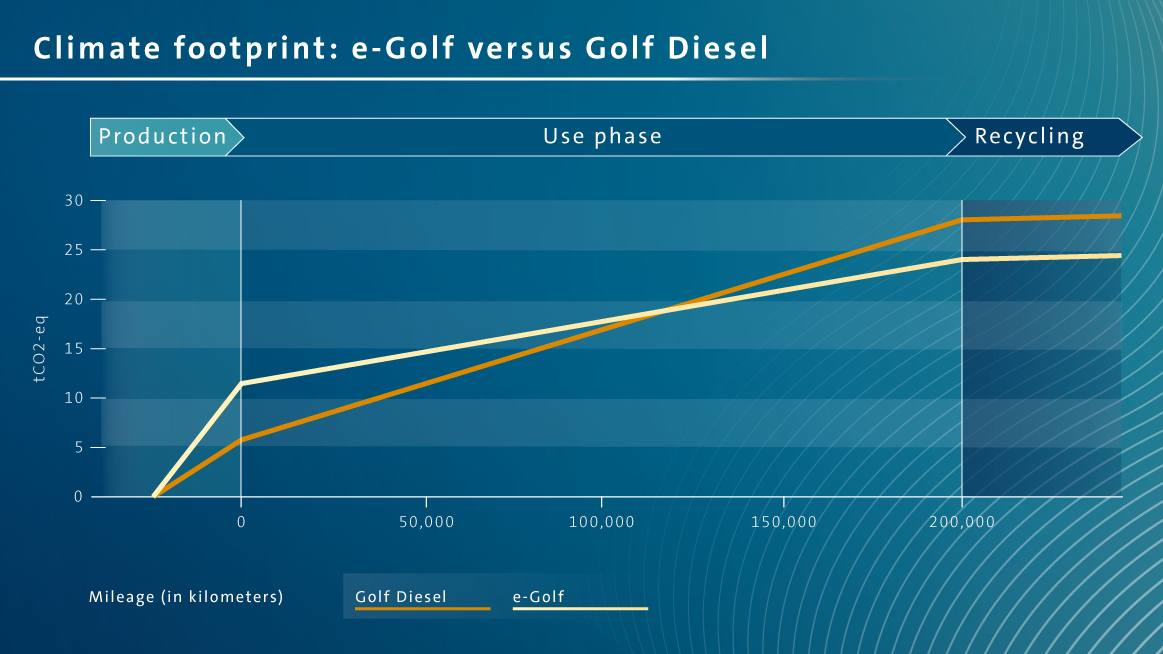

In [4]:
Image('images/FT_1.png',width=800)

These plots consider the carbon footprint of the gasoline car, and the carbon footprint of the electric car, including its battery production. So, although the slope of the emissions production of an electric car is smaller than its ICE counterpart, because of the initial difference between the two, it takes the total CO2 production of the BEV (battery electric vehicle) a while to get below the emissions of the ICE car.

Additionally, the source from which the electricity to charge the BEV car comes from, can significantly change the above-mentioned slope for the electric cars. This can be indirectly inferred from the below plot from the same source:

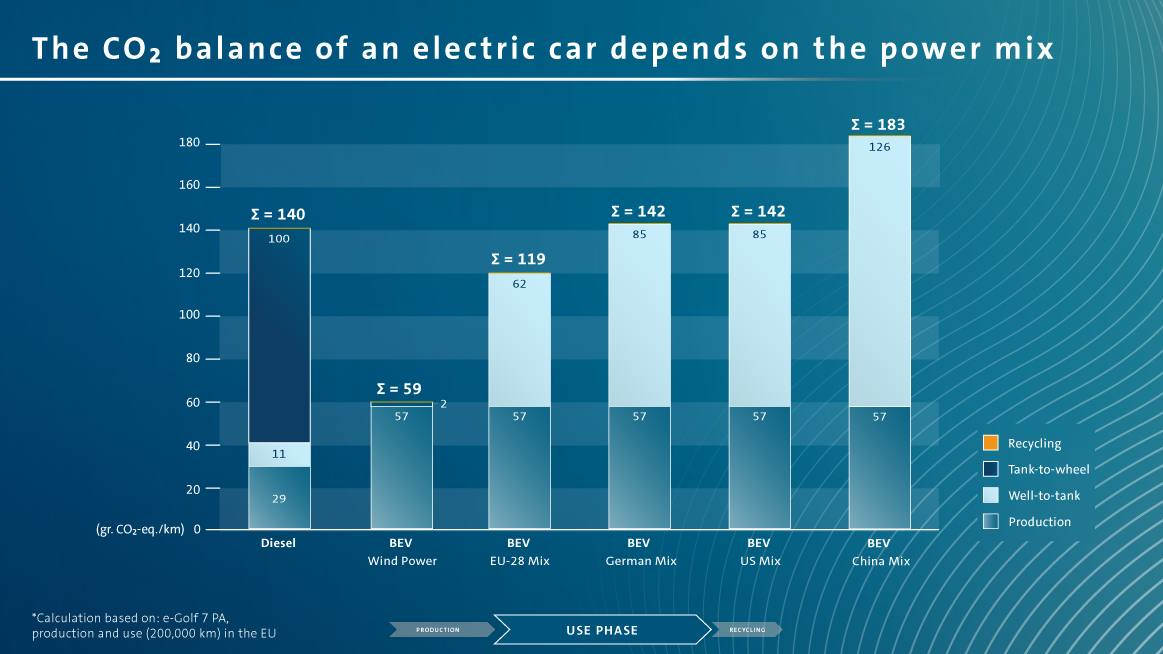

In [5]:
Image('images/FT_2.png',width=800)

And the below image ([here](https://www.nytimes.com/interactive/2018/12/24/climate/how-electricity-generation-changed-in-your-state.html)) shows the main source of electricity production in different states in 2001 and 2017. It shows that for the majority of the states, coal, and natural gas are the main source of electricity production. In these states, it takes the BEV much longer to catch up to the ICE car.

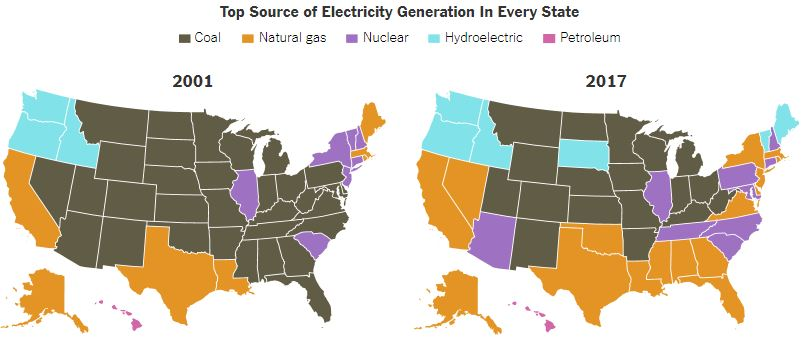

In [6]:
Image('images/NYTimes.JPG',width=800)

So, while it is true that in some states and for some usage cases the BEV may be better for the planet, it equally can be claimed that in many other cases, the ICE is much better than the BEV for the environment. On top of this, there are some other options available such as plug-in hybrid vehicles and full hybrid vehicles, which use the best of both worlds, and can be much more environmentally-friendly.

In conclusion, it is established that the car type, type of usage of the car, the number of miles it is driven in a given year, the state in which the car is being used, and many other factors change how environment-friendly a car is. In this effect, a tool can be produced to help a potential car buyer having the planet in mind to make a more educated decision on the type of car he/she can buy to satisfy their needs while helping reduce the emissions harming the planet.

Additionally, the initial cost of the BEV at this point is much more than that of an ICE car. But, since the charging and maintenance costs of the BEV are less than the ICE cars, over time it may be more beneficial for the customer to invest in a BEV. This too depends on many factors, such as the price of gasoline vs electricity, the usage of the car, differences in taxes, for how many years the person intends to use the car before replacing it with a new one, etc. So, this tool can also do some quick estimations, to help the buyer know more about the overall costs of owning each car.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.lines import Line2D

In [8]:
emissions_avg = pd.read_excel('emission_average.xlsx',sheet_name='4-43',nrows=48).set_index(['index_0','index_1','emission_type'])

- Data obtained from [here](https://www.bts.gov/content/estimated-national-average-vehicle-emissions-rates-vehicle-vehicle-type-using-gasoline-and)

In [9]:
vehicles = pd.read_csv('vehicles.csv')
emissions = pd.read_csv('emissions.csv')

/usr/people/shared/tools/centos/7/python/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


- Data obtained from [here](https://www.fueleconomy.gov/feg/download.shtml)
# vehicle
- atvtype - type of alternative fuel or advanced technology vehicle
- barrels08 - annual petroleum consumption in barrels for fuelType1 (1)
- barrelsA08 - annual petroleum consumption in barrels for fuelType2 (1)
- charge120 - time to charge an electric vehicle in hours at 120 V
- charge240 - time to charge an electric vehicle in hours at 240 V
- city08 - city MPG for fuelType1 (2), (11)
- city08U - unrounded city MPG for fuelType1 (2), (3)
- cityA08 - city MPG for fuelType2 (2)
- cityA08U - unrounded city MPG for fuelType2 (2), (3)
- cityCD - city gasoline consumption (gallons/100 miles) in charge depleting mode (4)
- cityE - city electricity consumption in kw-hrs/100 miles
- cityUF - EPA city utility factor (share of electricity) for PHEV
- co2 - tailpipe CO2 in grams/mile for fuelType1 (5)
- co2A - tailpipe CO2 in grams/mile for fuelType2 (5)
- co2TailpipeAGpm - tailpipe CO2 in grams/mile for fuelType2 (5)
- co2TailpipeGpm- tailpipe CO2 in grams/mile for fuelType1 (5)
- comb08 - combined MPG for fuelType1 (2), (11)
- comb08U - unrounded combined MPG for fuelType1 (2), (3)
- combA08 - combined MPG for fuelType2 (2)
- combA08U - unrounded combined MPG for fuelType2 (2), (3)
- combE - combined electricity consumption in kw-hrs/100 miles
- combinedCD - combined gasoline consumption (gallons/100 miles) in charge depleting mode (4)
- combinedUF - EPA combined utility factor (share of electricity) for PHEV
- cylinders - engine cylinders
- displ - engine displacement in liters
- drive - drive axle type
- emissionsList
- engId - EPA model type index
- eng_dscr - engine descriptor; see http://www.fueleconomy.gov/feg/findacarhelp.shtml#engine
- evMotor - electric motor (kw-hrs)
- feScore - EPA Fuel Economy Score (-1 = Not available)
- fuelCost08 - annual fuel cost for fuelType1 (\$) (7)
- fuelCostA08 - annual fuel cost for fuelType2 (\$) (7)
- fuelType - fuel type with fuelType1 and fuelType2 (if applicable)
- fuelType1 - fuel type 1. For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.
- fuelType2 - fuel type 2. For dual fuel vehicles, this will be the alternative fuel (e.g. E85, Electricity, CNG, LPG). For single fuel vehicles, this field is not used
- ghgScore - EPA GHG score (-1 = Not available)
- ghgScoreA - EPA GHG score for dual fuel vehicle running on the alternative fuel (-1 = Not available)
- guzzler- if G or T, this vehicle is subject to the gas guzzler tax
- highway08 - highway MPG for fuelType1 (2), (11)
- highway08U - unrounded highway MPG for fuelType1 (2), (3)
- highwayA08 - highway MPG for fuelType2 (2)
- highwayA08U - unrounded highway MPG for fuelType2 (2),(3)
- highwayCD - highway gasoline consumption (gallons/100miles) in charge depleting mode (4)
- highwayE - highway electricity consumption in kw-hrs/100 miles
- highwayUF - EPA highway utility factor (share of electricity) for PHEV
- hlv - hatchback luggage volume (cubic feet) (8)
- hpv - hatchback passenger volume (cubic feet) (8)
- id - vehicle record id
- lv2 - 2 door luggage volume (cubic feet) (8)
- lv4 - 4 door luggage volume (cubic feet) (8)
- make - manufacturer (division)
- mfrCode - 3-character manufacturer code
- model - model name (carline)
- mpgData - has My MPG data; see yourMpgVehicle and yourMpgDriverVehicle
- phevBlended - if true, this vehicle operates on a blend of gasoline and electricity in charge depleting mode
- pv2 - 2-door passenger volume (cubic feet) (8)
- pv4 - 4-door passenger volume (cubic feet) (8)
- rangeA - EPA range for fuelType2
- rangeCityA - EPA city range for fuelType2
- rangeHwyA - EPA highway range for fuelType2
- trans_dscr - transmission descriptor; see http://www.fueleconomy.gov/feg/findacarhelp.shtml#trany
- trany - transmission
- UCity - unadjusted city MPG for fuelType1; see the description of the EPA test procedures
- UCityA - unadjusted city MPG for fuelType2; see the description of the EPA test procedures
- UHighway - unadjusted highway MPG for fuelType1; see the description of the EPA test procedures
- UHighwayA - unadjusted highway MPG for fuelType2; see the description of the EPA test procedures
- VClass - EPA vehicle size class
- year - model year
- youSaveSpend - you save/spend over 5 years compared to an average car (\$). Savings are positive; a greater amount spent yields a negative number. For dual fuel vehicles, this is the cost savings for gasoline
- sCharger - if S, this vehicle is supercharged
- tCharger - if T, this vehicle is turbocharged
- c240Dscr - electric vehicle charger description
- charge240b - time to charge an electric vehicle in hours at 240 V using the alternate charger
- c240bDscr - electric vehicle alternate charger description
- createdOn - date the vehicle record was created (ISO 8601 format)
- modifiedOn - date the vehicle record was last modified (ISO 8601 format)
- startStop - vehicle has start-stop technology (Y, N, or blank for older vehicles)
- phevCity - EPA composite gasoline-electricity city MPGe for plug-in hybrid vehicles
- phevHwy - EPA composite gasoline-electricity highway MPGe for plug-in hybrid vehicles
- phevComb - EPA composite gasoline-electricity combined city-highway MPGe for plug-in hybrid vehicles

# emissions
- emissionsList
 - emissionsInfo
  - efid - engine family ID
  - id - vehicle record ID (links emission data to the vehicle record)
  - salesArea - EPA sales area code
  - score - EPA 1-10 smog rating for fuelType1
  - scoreAlt - EPA 1-10 smog rating for fuelType2
  - smartwayScore - SmartWay Code
  - standard - Vehicle Emission Standard Code
  - stdText - Vehicle Emission Standard

# fuel prices
- fuelPrices
 - midgrade - \$ per gallon of midgrade gasoline(9)
 - premium - \$ per gallon of premium gasoline(9)
 - regular - \$ per gallon of regular gasoline(9)
 - cng - \$ per gallon of gasoline equivalent (GGE) of compressed natural gas(10)
 - diesel - \$ per gallon of diesel(9)
 - e85 - \$ per gallon of E85(10)
 - electric - \$ per kw-hr of electricity(10)
 - lpg - \$ per gallon of propane(10)

In [10]:
gasoline = pd.read_excel('US_Regular_Gasoline_Prices.xls',sheet_name='Data 12',skiprows=[0,1])
gasoline['Date'] = pd.to_datetime(gasoline['Date'],errors='coerce')
diesel = pd.read_excel('US_On_Highway_Diesel_Fuel_Prices.xls',sheet_name='Data 1',skiprows=[0,1])
gasoline_and_diesel = pd.read_excel('PET_PRI_GND_DCUS_NUS_W.xls',sheet_name='Data 1',skiprows=[0,1])
gasoline_retail = pd.read_excel('PET_PRI_GND_A_EPM0_PTE_DPGAL_W.xls',sheet_name='Data 1',skiprows=[0,1])
gasoline_regions = pd.read_excel('PET_PRI_GND_A_EPM0_PTE_DPGAL_W.xls',sheet_name='Data 2',skiprows=[0,1])
gasoline_states = pd.read_excel('PET_PRI_GND_A_EPM0_PTE_DPGAL_W.xls',sheet_name='Data 3',skiprows=[0,1])
gasoline_cities = pd.read_excel('PET_PRI_GND_A_EPM0_PTE_DPGAL_W.xls',sheet_name='Data 4',skiprows=[0,1])

- Data obtained from [here](https://www.eia.gov/petroleum/gasdiesel/)
# US Regular Gasoline Prices
- All Grades, Areas and Formulations
# US On-Highway Diesel Prices
- Weekly Diesel Prices - All Types

/usr/people/shared/tools/centos/7/python/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/people/shared/tools/centos/7/python/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/people/shared/tools/centos/7/python/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


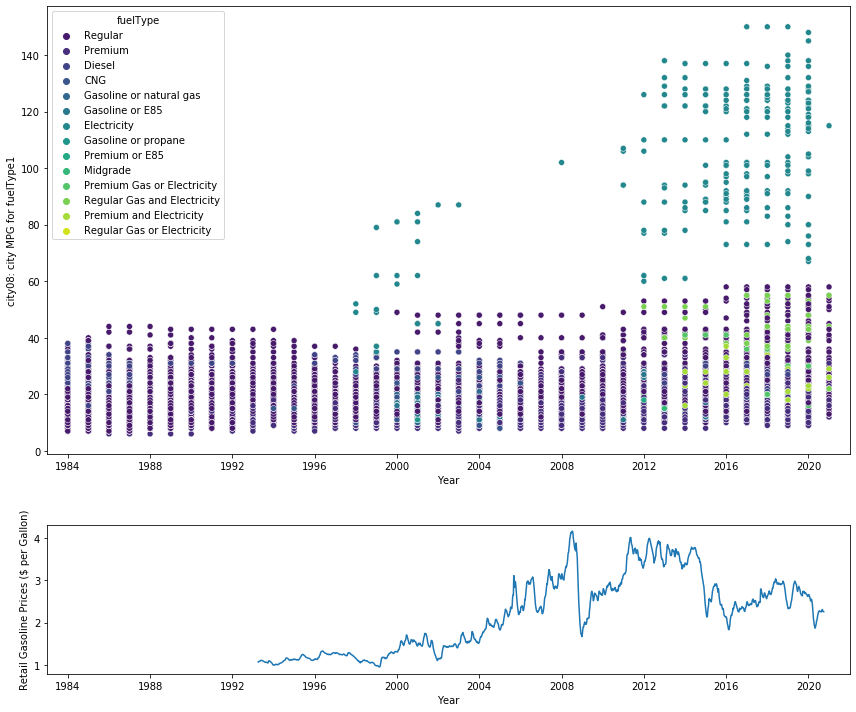

In [11]:
f, (ax1, ax2) = plt.subplots(2,figsize=(12,10),gridspec_kw={'height_ratios': [3, 1]})
sns.scatterplot(x='year',y='city08',data=vehicles,hue='fuelType',palette='viridis',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_xlim(1983,2022)
ax1.set_xticks(np.arange(1984,2021,4))
ax1.set_ylabel('city08: city MPG for fuelType1')
ax2.plot(gasoline['Date'],
         gasoline['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'])
ax2.set_xlim(datetime.date(1983,1,1),datetime.date(2022,1,1))
ax2.set_xlabel('Year')
ax2.set_ylabel('Retail Gasoline Prices (\$ per Gallon)')
plt.tight_layout()
plt.show()

/usr/people/shared/tools/centos/7/python/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/people/shared/tools/centos/7/python/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/people/shared/tools/centos/7/python/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


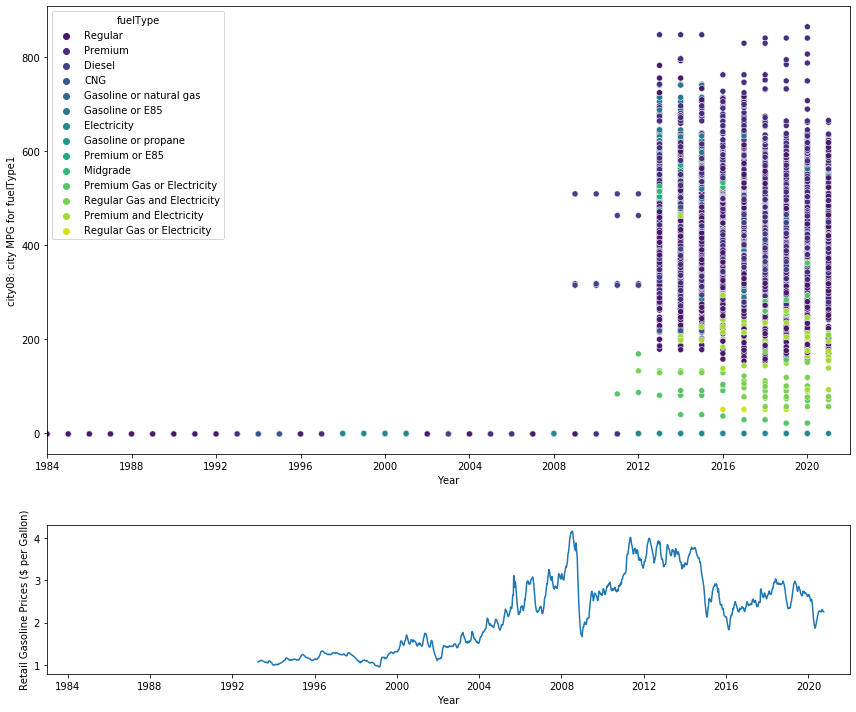

In [195]:
f, (ax1, ax2) = plt.subplots(2,figsize=(12,10),gridspec_kw={'height_ratios': [3, 1]})
sns.scatterplot(x='year',y='co2',data=vehicles,hue='fuelType',palette='viridis',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_xlim(2009,2022)
ax1.set_xticks(np.arange(1984,2021,4))
ax1.set_ylabel('city08: city MPG for fuelType1')
ax2.plot(gasoline['Date'],
         gasoline['Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)'])
ax2.set_xlim(datetime.date(1983,1,1),datetime.date(2022,1,1))
ax2.set_xlabel('Year')
ax2.set_ylabel('Retail Gasoline Prices (\$ per Gallon)')
plt.tight_layout()
plt.show()

- The 1st plot shows that in general, the electric cars have larger "mpg" values. But there are some ICE cars or hybrid cars with pretty large mpg values present in the plot as well.
- It can be inferred from the that the gasoline price rise between 2008 to 2012 may have had some effects on more development in electric cars, making them economically more viable. However, the gasoline prices later reduced significantly, which weighs in favor of the ICE cars.
- Now, we are going to look at how the emissions have progressed over the years.

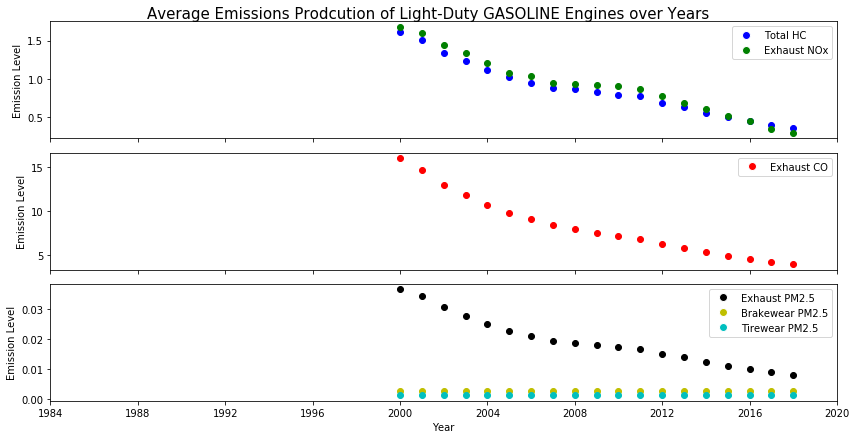

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(12,6), sharex=True)

plt.suptitle('Average Emissions Prodcution of Light-Duty GASOLINE Engines over Years',x=0.5,y=1.01,fontsize=15)

for year in range(2000,2019):
    ax1.plot(year,emissions_avg[year].loc['GASOLINE']['Light-duty vehicles']['Total HC'],'ob')
    ax1.plot(year,emissions_avg[year].loc['GASOLINE']['Light-duty vehicles']['Exhaust NOx'],'og')
    ax2.plot(year,emissions_avg[year].loc['GASOLINE']['Light-duty vehicles']['Exhaust CO'],'or')
    ax3.plot(year,emissions_avg[year].loc['GASOLINE']['Light-duty vehicles']['Exhaust PM2.5'],'ok')
    ax3.plot(year,emissions_avg[year].loc['GASOLINE']['Light-duty vehicles']['Brakewear PM2.5'],'oy')
    ax3.plot(year,emissions_avg[year].loc['GASOLINE']['Light-duty vehicles']['Tirewear PM2.5'],'oc')

ax1.set_xticks(np.arange(1984,2021,4))
ax2.set_xticks(np.arange(1984,2021,4))
ax3.set_xticks(np.arange(1984,2021,4))
ax1.set_ylabel('Emission Level')
ax2.set_ylabel('Emission Level')
ax3.set_ylabel('Emission Level')
ax3.set_xlabel('Year')

custom_lines_ax1 = [Line2D([0], [0],marker='o', color='w', label='Scatter',markerfacecolor='b', markersize=8),
                    Line2D([0], [0],marker='o', color='w', label='Scatter',markerfacecolor='g', markersize=8),
                   ]
custom_lines_ax2 = [Line2D([0], [0],marker='o', color='w', label='Scatter',markerfacecolor='r', markersize=8),
                   ]
custom_lines_ax3 = [Line2D([0], [0],marker='o', color='w', label='Scatter',markerfacecolor='k', markersize=8),
                    Line2D([0], [0],marker='o', color='w', label='Scatter',markerfacecolor='y', markersize=8),
                    Line2D([0], [0],marker='o', color='w', label='Scatter',markerfacecolor='c', markersize=8)
                   ]
ax1.legend(custom_lines_ax1, ['Total HC', 'Exhaust NOx'])
ax2.legend(custom_lines_ax2, ['Exhaust CO'])
ax3.legend(custom_lines_ax3, ['Exhaust PM2.5', 'Brakewear PM2.5', 'Tirewear PM2.5'])
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

- It can be clearly seen that the emission production of light-duty gasoline engine cars have been steadily reducing over the years from 2000 to present. This means that the ICE cars are much more friendly to the environment than they were a few years ago. Also, the EPA regulations for new cars guarantee that this trend stays the same for the foreseeable future.

- It is shown in different studies that the efficiency of BEVs is significantly dependent on the temperature. So, we also need to get the history of daily temperatures of the place of residence to consider its effects on the efficiency of the car.

- We need to write a piece of code that inputs the most frequent path(s) the driver intends to drive his/her car, e.g. from Home to Work and back, or from Home to grocery store and back.
- We then communicate with google maps to get the distance between these locations, and the average time it takes to drive each route at given times. This information along with the MPG of the car, can be used to estimate the amount of fuel the car needs (to derive the cost of fuel), and the emissions the car is going to make on average based on its emission level.

- The same calculation can be done for the electric car based on the amount of energy it uses in these same paths. Depending on the state in which the car is being driven, the estimated emission levels would be different.

# Here is what I envision the code will look like:

## Inputs from the user

1. home address
2. work address
3. baby day-care address if any
4. grocery store address
5. estimated number of commutes between each of the above addresses in a week
6. An estimation on the number of miles driven for travel each year
7. Intended budget to buy a new car
8. Some classification about what they need from the car (offroad, city transit, long travels, carrying trailers, etc.)

## The code
- Based on the above information, from the google maps we can get an estimation of the number of miles the user is going to drive the car in the city, on highways, etc.
- This will help us come up w/ an overall amount of fuel/electricity they are going to need for different cars.
- Based on their residence address, we can get trends of car prices, fuel prices, electricity prices, the source of the electricity, ambient temperature, etc. to provide the user w/ an interactive tool that shows the following:


## Outputs
1. A few suggestions of different cars the users can purchase within their budget.
2. In an interactive plot, we can show the estimated emissions produced by each car over the years of usage.
3. In an interactive plot, we can show the estimated cost of purchasing, maintenance, and fueling/charging each car over the years of usage.
4. After the users make their decisions, we can do a web scraping to find a few dealerships in their neighborhood that offer the best deal for the chosen car.

# Thanks for your attention!

# Average mileage/year based on age/gender

from: https://www.fhwa.dot.gov/ohim/onh00/bar8.htm

In [146]:
ages   = ['16-19','20-34','35-54','55-64','65+','Average']
male   = [8_206,17_976,18_856,15_859,10_304,16_550]
female = [6_873,12_004,11_464,7_780,4_785,10_142]
total  = [7_624,15_098,15_291,11_972,76_46,13_476]
averages = pd.DataFrame(data=[ages,male,female,total]).T
averages.columns = ['Age','Male','Female','Total']
averages.set_index('Age',inplace = True)

In [164]:
averages

,Male,Female,Total
Age,,,
16-19,8206,6873,7624
20-34,17976,12004,15098
35-54,18856,11464,15291
55-64,15859,7780,11972
65+,10304,4785,7646
Average,16550,10142,13476


In [95]:
import requests
import math

In [14]:
#API key
api_file = open('API.key', 'r')
API = api_file.read()
api_file.close()

In [166]:
def get_age():
    
    age = input('How old are you?\n')
    
    while(age.isdigit() != True):
        age = input('Please enter a digit larger than or equal to 16:\n')
        
    return int(age)

In [173]:
def get_gender():
    
    gender = input('What is your gender identity? ((F)emale/ (M)ale\n')
    
    while(gender[0].lower() not in ['f','m']):
        gender = input('Please use one of these options: (F)emale/ (M)ale\n')
        
    return gender[0].lower()

In [190]:
def get_avg_mileage():
    
    pref = input('Would you prefer to use:\n'
                  '(1) the overall average\n'
                  '(2) the average based on your age\n'
                  '(3) the average based on your gender\n'
                  '(4) the average based on your age/gender?\n')
    while(pref not in ['1','2','3','4']):
        pref = input('Please enter either 1, 2, 3, or 4:\n')

    if(pref == '1'):
        return averages['Total']['Average']

    elif(pref == '2'):
        age = get_age()
        if(age <= 19):
            return averages['Total']['16-19']
        elif(age >= 20 and age <= 34):
            return averages['Total']['20-34']
        elif(age >= 35 and age <= 54):
            return averages['Total']['35-54']
        elif(age >= 55 and age <= 64):
            return averages['Total']['55-64']
        else:
            return averages['Total']['65+']

    elif(pref == '3'):
        gender = get_gender()
        if(gender == 'f'):
            return averages['Female']['Average']
        else:
            return averages['Male']['Average']

    else:
        age = get_age()
        gender = get_gender()
        if(gender == 'f'):
            if(age <= 19):
                return averages['Female']['16-19']
            elif(age >= 20 and age <= 34):
                return averages['Female']['20-34']
            elif(age >= 35 and age <= 54):
                return averages['Female']['35-54']
            elif(age >= 55 and age <= 64):
                return averages['Female']['55-64']
            else:
                return averages['Female']['65+']
        else:
            if(age <= 19):
                return averages['Male']['16-19']
            elif(age >= 20 and age <= 34):
                return averages['Male']['20-34']
            elif(age >= 35 and age <= 54):
                return averages['Male']['35-54']
            elif(age >= 55 and age <= 64):
                return averages['Male']['55-64']
            else:
                return averages['Male']['65+']

In [79]:
def get_address(place):
    
    return input('Enter ' + place + ' address:\n')

In [51]:
def get_num_commute_times(place, freq):
    
    num = input('How many times do you commute between home and ' + place + ' every ' + freq + '?\n')
        
    while(num.isdigit() != True):
        num = input('Please enter a digit:\n')
            
    return num

In [17]:
def get_route(orig, dest):
    
    url_dist = 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&'
    return requests.get(url_dist + "origins=" + orig + "&destinations=" + dest + "&key=" + API)

In [101]:
def get_dir(orig, dest):
    
    url_dir = 'https://maps.googleapis.com/maps/api/directions/json?units=metric&'
    return requests.get(url_dir + "origin=" + orig + "&destination=" + dest + "&key=" + API)

In [18]:
def get_seconds(route):
    
    return route.json()['rows'][0]['elements'][0]['duration']['value']

In [19]:
def get_miles(route):
    
    return route.json()['rows'][0]['elements'][0]['distance']['value']

In [197]:
def miles_estimator():
        
    answer = input('Would you like to use:\n'
                   '(1) the average mileage/year of the US\n'
                   '(2) make an estimation based on your addresses?\n')
    while(answer not in ['1','2']):
        answer = input('Please enter "1"/"2":\n')
        
    if(answer==str(1)):
                
        tot_miles = get_avg_mileage()
        tot_time = 'Not Available'
        
        return (math.ceil(tot_miles), tot_time)
        
    else:
        addresses = {}
        
        addresses['route_home_work'] = {}
        addresses['route_home_work']['orig'] = get_address('home')
        addresses['route_home_work']['dest'] = get_address('work')
        addresses['route_home_work']['num']  = int(get_num_commute_times('work','week'))
        addresses['route_home_work']['mult'] = 52
        
        addresses['route_home_grocery'] = {}
        addresses['route_home_grocery']['orig'] = addresses['route_home_work']['orig']
        addresses['route_home_grocery']['dest'] = get_address('grocery store')
        addresses['route_home_grocery']['num']  = int(get_num_commute_times('grocery store','week'))
        addresses['route_home_grocery']['mult'] = 52

        long_com = input('Are there any long commutes that you usually do? (yes/no)\n')
        while(long_com.lower()[0] not in ['y','n']):
            long_com = input('Please answer "yes"/"no"?\n')
        
        if(long_com.lower()[0]=='y'):
            num_long_com = input('How many different places?\n')
            while(num_long_com.isdigit() != True):
                num_long_com = input('Please enter a digit:\n')
            for i in range(int(num_long_com)):
                addresses['route_home_loc_'+str(i)] = {}
                addresses['route_home_loc_'+str(i)]['orig'] = addresses['route_home_work']['orig']
                addresses['route_home_loc_'+str(i)]['dest'] = get_address('location_'+str(i+1))
                addresses['route_home_loc_'+str(i)]['num']  = int(get_num_commute_times(addresses['route_home_loc_'+str(i)]['dest'].upper(),'year'))
                addresses['route_home_loc_'+str(i)]['mult'] = 1
        
        tot_miles = 0
        tot_time = 0
        for key in addresses.keys():
            addresses[key]['route'] = get_route(addresses[key]['orig'], addresses[key]['dest'])
            addresses[key]['miles'] = get_miles(addresses[key]['route'])
            addresses[key]['seconds'] = get_miles(addresses[key]['route'])
            
            tot_miles += addresses[key]['miles'] * addresses[key]['num'] * addresses[key]['mult'] * 2 / 1000 #km
            tot_time += addresses[key]['seconds'] * addresses[key]['num'] * addresses[key]['mult'] * 2 / 3600 #hours

        return (math.ceil(tot_miles), math.ceil(tot_time))

In [198]:
miles_estimator()

Would you like to use:
(1) the average mileage/year of the US
(2) make an estimation based on your addresses?
2
Enter home address:
Madison, WI
Enter work address:
Middleton, WI
How many times do you commute between home and work every week?
5
Enter grocery store address:
Fitchburg, WI
How many times do you commute between home and grocery store every week?
2
Are there any long commutes that you usually do? (yes/no)
y
How many different places?
1
Enter location_1 address:
Chicago, IL
How many times do you commute between home and CHICAGO, IL every year?
6


(9672, 2687)

In [ ]:
vehicles['id|model|year|disp|tran|eng_desc'] = vehicles['id'].apply(str) + '|' + vehicles['model'] + '|' + vehicles['year'].apply(str) + '|' + vehicles['displ'].apply(str) + '|' + vehicles['trany']

In [ ]:
vehicles = vehicles.set_index('id|model|year|disp|tran|eng_desc')

In [ ]:
vehicles_dict = vehicles.T.to_dict()

In [ ]:
vehicles.reset_index()['model-year']